In [29]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from ipywidgets import widgets, Checkbox, FloatSlider, IntSlider, IntRangeSlider, FloatRangeSlider, RadioButtons
from IPython.core.display import clear_output, display
%matplotlib qt

# Calibrate

In [136]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../calibration-elp-final/WIN*.jpg')[0:9]

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

print("Number of calibration images: {}".format(len(images)))
print(images)

Number of calibration images: 9
['../calibration-elp-final\\WIN_20170604_18_16_51_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_17_02_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_17_12_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_18_01_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_18_10_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_18_24_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_18_55_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_19_00_Pro.jpg', '../calibration-elp-final\\WIN_20170604_18_19_05_Pro.jpg']


Return of calibrate camera: 0.25630490783172316


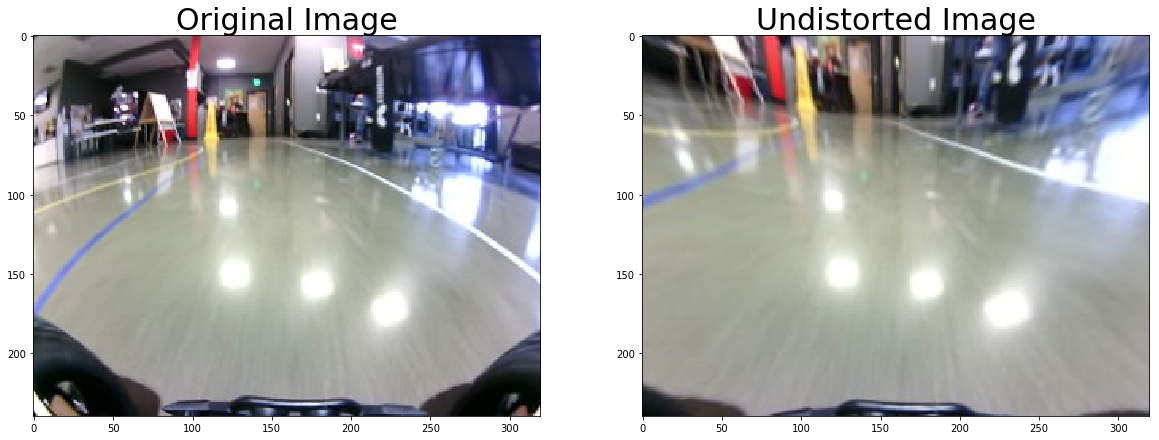

In [137]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('test_images/2017-06-05_03-06-54.960366.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

print("Return of calibrate camera: {}".format(ret))
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration-elp-final/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "../calibration-elp-final/cal-elp.p", "wb" ) )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Perspective Transform

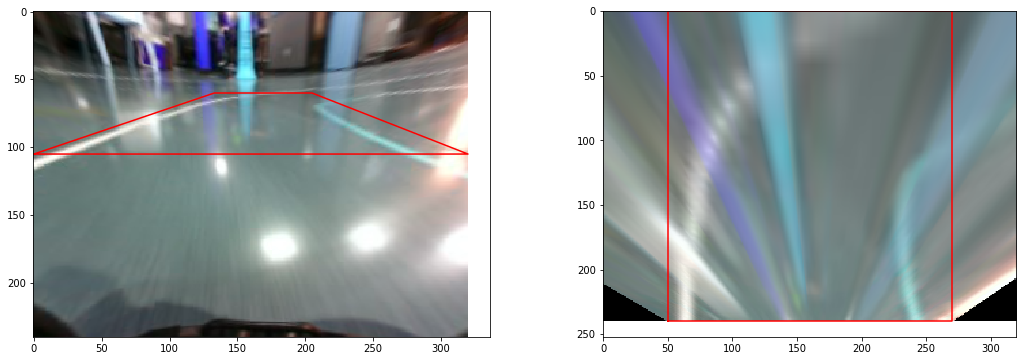

In [152]:
fig = plt.figure(figsize=(18, 6))

img = cv2.imread('test_images/middle.jpg')

img_size = (img.shape[1], img.shape[0])

left_top = 133
left_bottom = 0
right_top = 205
right_bottom = 320
top = 60
bottom = 105


src = np.float32([[left_bottom,bottom],
                 [left_top,top],
                 [right_top,top],
                 [right_bottom,bottom]])

width = 220
left = (img_size[0] - width) / 2
right = left + width
top = 0
bottom = 240
dst = np.float32([[left,bottom],
                 [left,top],
                 [right,top],
                 [right,bottom]])

a = fig.add_subplot(1, 2, 1)
undist_img = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist_img)
a.plot(np.append(src[:,0],src[0,0]), np.append(src[:,1],src[0,1]), '-r')

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist_img, M, img_size)

a = fig.add_subplot(1, 2, 2)
plt.imshow(warped)
_ = a.plot(np.append(dst[:,0],dst[0,0]), np.append(dst[:,1],dst[0,1]), '-r')

# Reflections removal

## Edges

Vertical Sobel

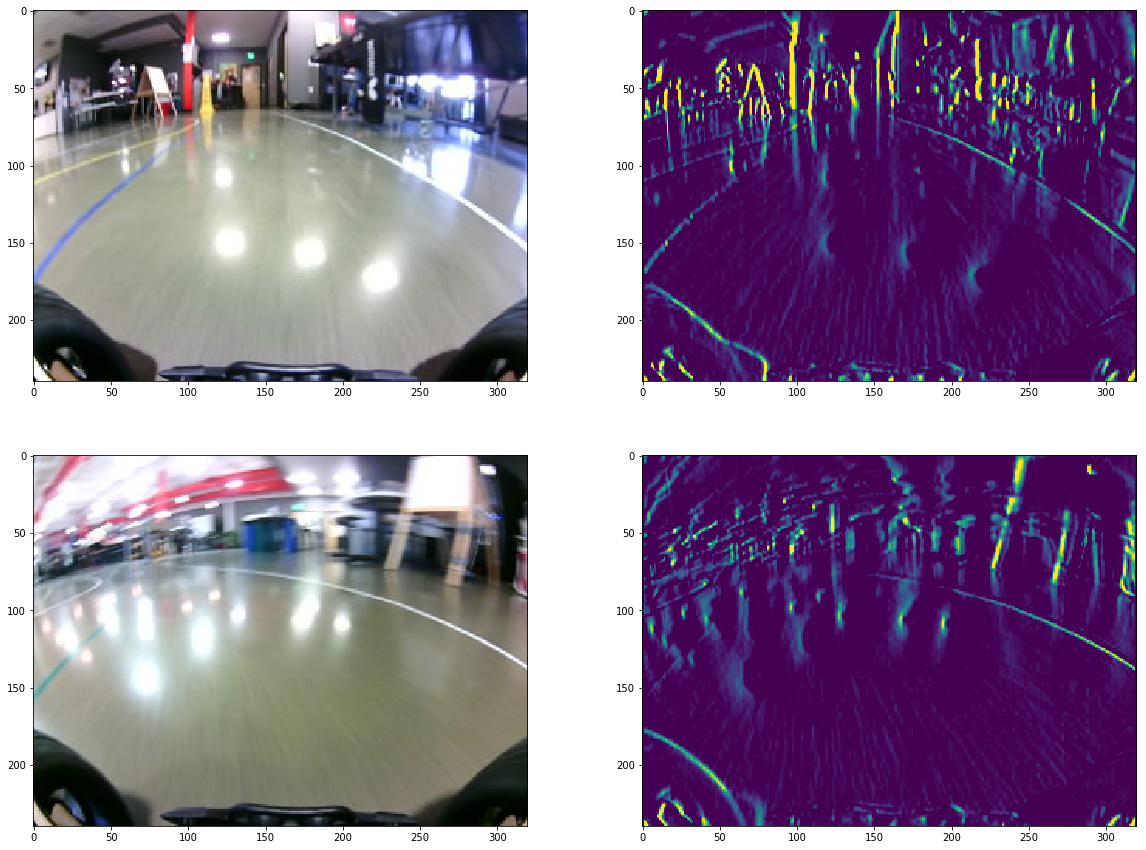

In [153]:
img_paths = glob.glob('test_images/*.jpg')[0:2]
fig = plt.figure(figsize=(20, 15))
rows = len(img_paths)
cols = 2
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 2]
    img = cv2.Sobel(img, -1, 1, 0, ksize=3)
    plt.imshow(img)
    i += 1

Horizontal Sobel

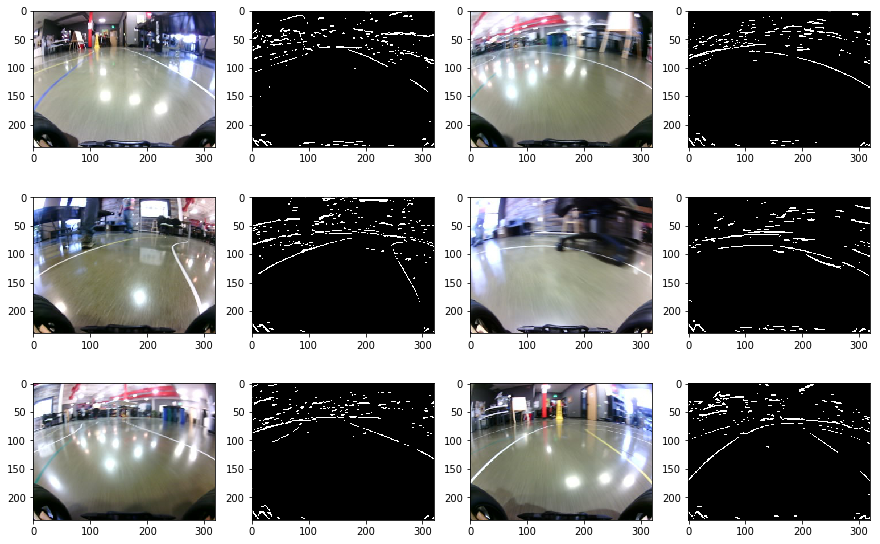

In [254]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
rows = len(img_paths)
cols = 4
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.Sobel(img, -1, 0, 1, ksize=3)
    img = img / 255.0
    img = img > 0.5
    plt.imshow(img[:,:,2], cmap='gray')
    i += 1

## Color

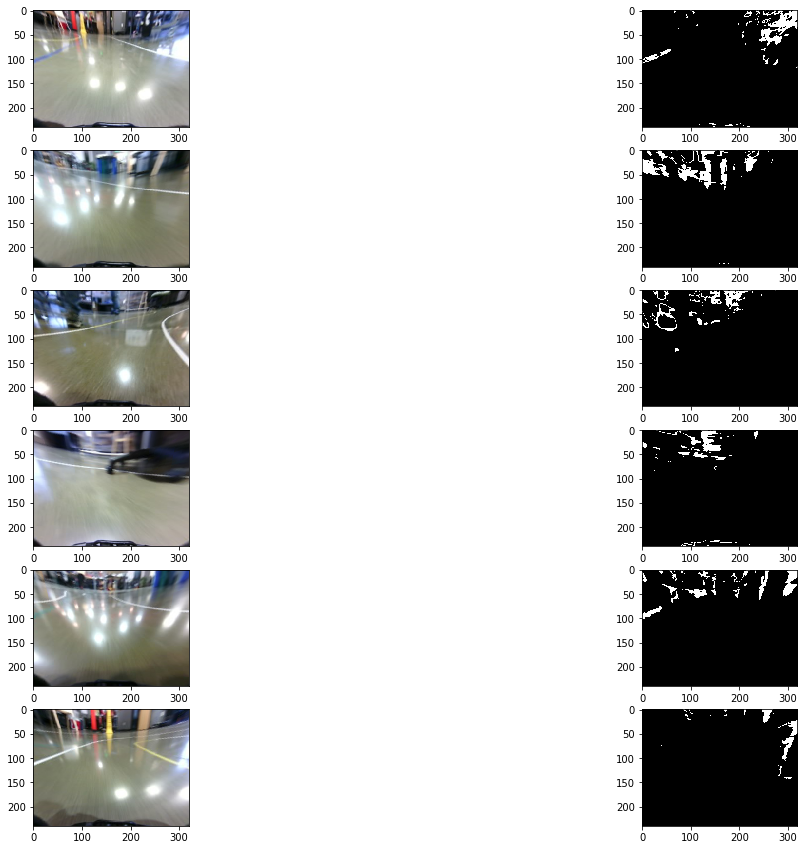

In [222]:
def find_color_hsv(change=None):
    inrange_min1 = inrange_min1_i.value
    inrange_min2 = inrange_min2_i.value
    inrange_min3 = inrange_min3_i.value
    inrange_max1 = inrange_max1_i.value
    inrange_max2 = inrange_max2_i.value
    inrange_max3 = inrange_max3_i.value
    
#     img_paths = ['test_images/test9.jpg', 'test_images/test8.jpg', 'test_images/test_from_course.jpg', 'test_images/test7.jpg', 'test_images/test4.jpg']
#     img_paths = ['test_images/test11.jpg', 'test_images/test12.jpg']
    img_paths = glob.glob('test_images/*.jpg')
    fig = plt.figure(figsize=(20, 15))
    rows = len(img_paths)
    cols = 2
    i = 1

    for img_path in img_paths:
        ax = fig.add_subplot(rows, cols, i)
        img = cv2.imread(img_path)
        undist_img = cv2.undistort(img, mtx, dist, None, mtx)
        img = cv2.cvtColor(undist_img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        i += 1

        ax = fig.add_subplot(rows, cols, i)
        img = cv2.cvtColor(undist_img, cv2.COLOR_BGR2HSV)
        img = cv2.inRange(img, (inrange_min1, inrange_min2, inrange_min3), (inrange_max1, inrange_max2, inrange_max3))
        plt.imshow(img, cmap='gray')
        i += 1

    clear_output(True)

inrange_min1_i = IntSlider(description='inrange min 1', min=0, max=255, step=1, value=62)
inrange_min2_i = IntSlider(description='inrange min 2', min=0, max=255, step=1, value=28)
inrange_min3_i = IntSlider(description='inrange min 3', min=0, max=255, step=1, value=135)
inrange_max1_i = IntSlider(description='inrange max 1', min=1, max=255, step=1, value=145)
inrange_max2_i = IntSlider(description='inrange max 2', min=1, max=255, step=1, value=255)
inrange_max3_i = IntSlider(description='inrange max 3', min=1, max=255, step=1, value=190)

inrange_min1_i.observe(find_color_hsv, 'value')
inrange_min2_i.observe(find_color_hsv, 'value')
inrange_min3_i.observe(find_color_hsv, 'value')
inrange_max1_i.observe(find_color_hsv, 'value')
inrange_max2_i.observe(find_color_hsv, 'value')
inrange_max3_i.observe(find_color_hsv, 'value')

display(inrange_min1_i, inrange_min2_i, inrange_min3_i,
        inrange_max1_i, inrange_max2_i, inrange_max3_i)
find_color_hsv()

# Calibrate + Sobel x + crop top

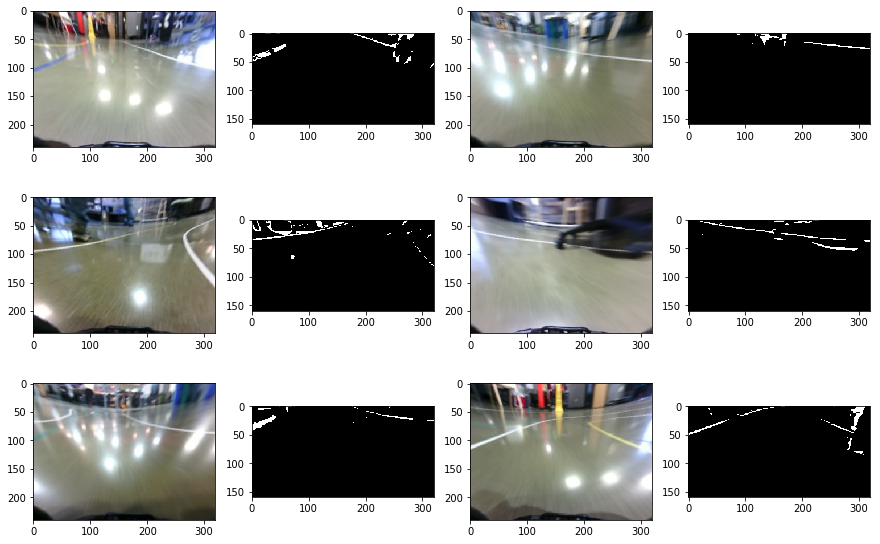

In [250]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
cols = 4
rows = len(img_paths)
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    img = cv2.cvtColor(undist_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)
    
    img = cv2.cvtColor(undist_img, cv2.COLOR_BGR2HSV)[:, :, 2]
    img = cv2.Sobel(img, -1, 0, 1, ksize=3)
    img = img / 255.0
    img = img > 0.5
    
    img1 = cv2.imread(img_path)
    undist_img = cv2.undistort(img1, mtx, dist, None, mtx)
    img1 = cv2.cvtColor(undist_img, cv2.COLOR_BGR2HSV)
    img1 = cv2.inRange(img1, (62, 28, 135), (145, 255, 190))
    img1 = img1 / 255
    img1 = img1 > 0.5
    final_img = (img==1) | (img1==1)
    
    final_img = final_img[60:220, :]
    plt.imshow(final_img, cmap='gray')
    i += 1

# Histogram